<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico I - Estadística </h1>
<h3> Análisis y Visualización de Datos - 2019 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10. Usaremos una [versión ya limpia del dataset](https://www.kaggle.com/gsutters/the-human-freedom-index/home) que pueden descargar desde Kaggle.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con dos estimadores principales: *hf_score* que hace referencia a Human Freedom, y *ef_score* que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [2]:
sns.__version__

'0.9.0'

In [3]:
dataset = pd.read_csv('./hfi_cc_2018.csv')
dataset.shape

(1458, 123)

In [4]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [5]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [6]:
dataset_filtered = dataset[important_cols]
dataset_filtered

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0


## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 
  3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

<h4>1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.</h4>

In [7]:
df = np.subtract(dataset_filtered.describe().loc[['max']], dataset_filtered.describe().loc[['min']])
df.index = ['Range']

In [8]:
df

,year,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
Range,8.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,6.31,161.0,5.360486,161.0


<h4>2. Obtener media, mediana y desviación estándar de las variables pf_identity y hf_score en el mundo y compararla con la de Latinoamérica y el caribe.</h4>

In [9]:
# Estadísticos en el mundo
print("Estadisticas Mundiales")
dataset[['pf_identity', 'hf_score']].describe().loc[['mean', '50%', 'std']]

Estadisticas Mundiales


,pf_identity,hf_score
mean,7.334180,6.993444
50%,9.166667,6.923840
std,3.159473,1.025811


In [10]:
# Estadísticos en la region
print("Estadisticas Sudamerica y el Caribe")
dataset[dataset['region'] == 'Latin America & the Caribbean'][['pf_identity', 'hf_score']].describe().loc[['mean', '50%', 'std']]

Estadisticas Sudamerica y el Caribe


,pf_identity,hf_score
mean,8.765086,7.047982
50%,10.000000,7.028045
std,1.711732,0.608904


<h4>2. Tiene sentido calcular la moda?</h4>

In [11]:
# Contar para el mundo
dataset_filtered['pf_identity'].value_counts()

10.000000    601
5.000000     167
7.500000     126
2.500000      78
0.000000      75
9.250000      72
8.333333      41
3.333333      30
6.666667      25
3.750000      21
6.250000      18
1.666667      15
4.166667      15
9.166667      15
8.750000      12
8.000000      11
5.833333       9
1.250000       9
0.833333       8
6.875000       6
4.250000       4
4.375000       4
9.375000       2
1.750000       2
4.875000       2
6.750000       2
5.500000       2
3.000000       2
9.000000       2
5.625000       2
Name: pf_identity, dtype: int64

In [12]:
# Contar para el Latinoamerica y el Caribe
dataset_filtered[dataset_filtered['region'] == 'Latin America & the Caribbean']['pf_identity'].value_counts()

10.000000    136
7.500000      35
5.000000      22
6.250000       8
9.166667       7
6.666667       6
6.875000       6
8.333333       4
8.750000       4
9.375000       2
9.250000       2
Name: pf_identity, dtype: int64

In [13]:
# Contar el mundo
dataset_filtered['hf_score'].value_counts()

7.745664    1
6.359020    1
6.079603    1
7.244499    1
8.638353    1
8.121204    1
7.065930    1
7.153167    1
6.397330    1
8.013608    1
8.005897    1
7.792327    1
6.559966    1
5.153065    1
5.397045    1
5.441680    1
7.027005    1
7.399236    1
6.734946    1
7.736980    1
7.819203    1
7.518632    1
6.555737    1
4.935571    1
6.225722    1
5.690525    1
6.195467    1
6.478120    1
8.125422    1
8.528704    1
           ..
6.928909    1
7.488132    1
7.224208    1
8.404652    1
8.202720    1
6.272191    1
6.357653    1
8.345881    1
5.640662    1
6.221742    1
6.421428    1
6.536133    1
7.638484    1
7.373849    1
7.055828    1
6.117849    1
6.867151    1
6.523791    1
8.760105    1
8.380704    1
7.663849    1
6.886891    1
7.814163    1
6.830228    1
7.682004    1
7.379236    1
7.669558    1
7.087987    1
6.565151    1
5.050736    1
Name: hf_score, Length: 1378, dtype: int64

In [14]:
# Contar el mundo
dataset_filtered[dataset_filtered['region'] == 'Latin America & the Caribbean']['hf_score'].value_counts()

6.994194    1
6.906582    1
7.300204    1
7.857714    1
6.920340    1
6.921105    1
8.227215    1
6.672614    1
6.848010    1
6.949657    1
7.244499    1
7.097205    1
7.518632    1
6.542688    1
6.569287    1
6.999313    1
5.156619    1
7.199154    1
7.033951    1
7.211521    1
7.420582    1
7.369415    1
7.060266    1
6.760757    1
7.203558    1
6.727381    1
7.302367    1
7.119652    1
7.451840    1
7.027005    1
           ..
7.534258    1
6.739684    1
7.224208    1
6.675898    1
7.630991    1
7.647620    1
7.278021    1
7.145432    1
6.678049    1
7.246088    1
7.068447    1
7.549042    1
6.747572    1
7.214674    1
8.008018    1
7.682004    1
6.207145    1
7.575393    1
6.811983    1
6.794579    1
6.825223    1
6.764906    1
6.523791    1
6.867151    1
6.725201    1
7.373849    1
7.075987    1
8.027501    1
7.856514    1
7.255032    1
Name: hf_score, Length: 232, dtype: int64

<div><h4> Nos parece que en el caso de <i>pf_identity</i> no tiene sentido por el hecho de que el valor esta compuesto por otros diferentes y la diferencia entre
paises no se vera reflejada.</h4>
<h4> Y en el caso de <i>hf_score</i> no tiene sentido ya que solo existen valores unicos</h4></div>

<h5>-----------------------------------------------------------------------------------------</h5>
<h4>3. ¿Son todos los valores de pf_identity y hf_score directamente comparables?</h4> 
<h5>Si porque están en un mismo rango de valores</h5>
<h4>¿Qué otra variable podría influenciarlos?</h4>
<h5>--------</h5>

<h4>4. ¿Cómo pueden sanearse los valores faltantes?</h4>
<h5>Pueden sanearse imputándolos con la media.</h5>

<h4>5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos?
¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?</h4>

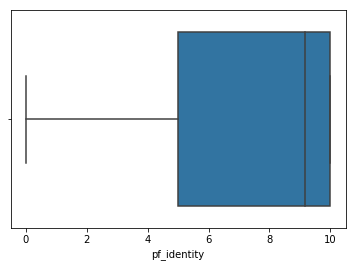

In [15]:
sns.boxplot(data=dataset_filtered, x=dataset_filtered['pf_identity'])

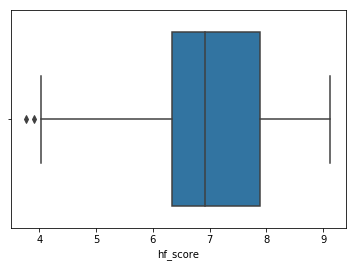

In [16]:
sns.boxplot(data=dataset_filtered, x=dataset_filtered['hf_score'])

In [17]:
dataset_filtered[dataset_filtered.year == 2016].sort_values('hf_score')[:5]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
141,2016,SYR,Syria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,5.02,157.0,3.765827,162.0
157,2016,VEN,Venezuela,Latin America & the Caribbean,0.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,7.500000,2.88,162.0,4.200724,161.0
159,2016,YEM,"Yemen, Rep.",Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,6.34,117.0,4.253278,160.0
69,2016,IRQ,Iraq,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,5.40,152.0,4.258014,159.0
86,2016,LBY,Libya,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.74,161.0,4.310283,158.0


<h5>Para identificar la existencia de outliers utilizamos box plot, una vez graficados vimos que la variable <i>hf_score</i> contenia outliers, y listamos. Conociendo los contextos de los outliers decidimos no eliminarlos ya que presentan un dato relevante (posibles conflictos economicos sociales como es el ejemplo de venezuela, o posibles conflictos armados en los demas) </h5>

## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Hint: hay un gráfico de seaborn que hace todo por vos!

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

In [18]:
sns.set(style="darkgrid")

In [19]:
# Pto 1
y1 = dataset[important_cols].groupby('year').agg('mean')['pf_identity']
y2 = dataset[important_cols].groupby('year').agg('mean')['hf_score']

<h4>1. Grafiquen la media de la variable pf_identity y hf_score a través de los años</h4>

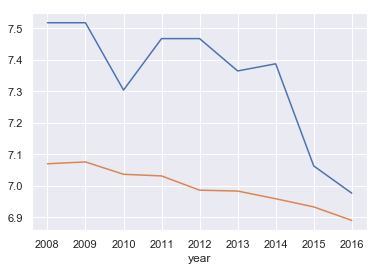

In [20]:
sns.lineplot(x=y1.index, y=y1.values)
sns.lineplot(x=y2.index, y=y2.values)

In [21]:
regions = pd.DataFrame(dataset[important_cols].groupby(['year','region']).agg('mean')['pf_identity'])

In [22]:
regions.reset_index(inplace=True)

In [23]:
regions

,year,region,pf_identity
0,2008,Caucasus & Central Asia,9.500000
1,2008,East Asia,10.000000
2,2008,Eastern Europe,9.880952
3,2008,Latin America & the Caribbean,8.900000
4,2008,Middle East & North Africa,3.653846
5,2008,North America,10.000000
6,2008,Oceania,9.375000
7,2008,South Asia,5.833333
8,2008,Sub-Saharan Africa,4.785714
9,2008,Western Europe,10.000000


In [24]:
regions.region.unique()

array(['Caucasus & Central Asia', 'East Asia', 'Eastern Europe',
       'Latin America & the Caribbean', 'Middle East & North Africa',
       'North America', 'Oceania', 'South Asia', 'Sub-Saharan Africa',
       'Western Europe'], dtype=object)

<h4>2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). 
¿La tendencia observada, es la misma que si no dividimos por regiones?</h4>

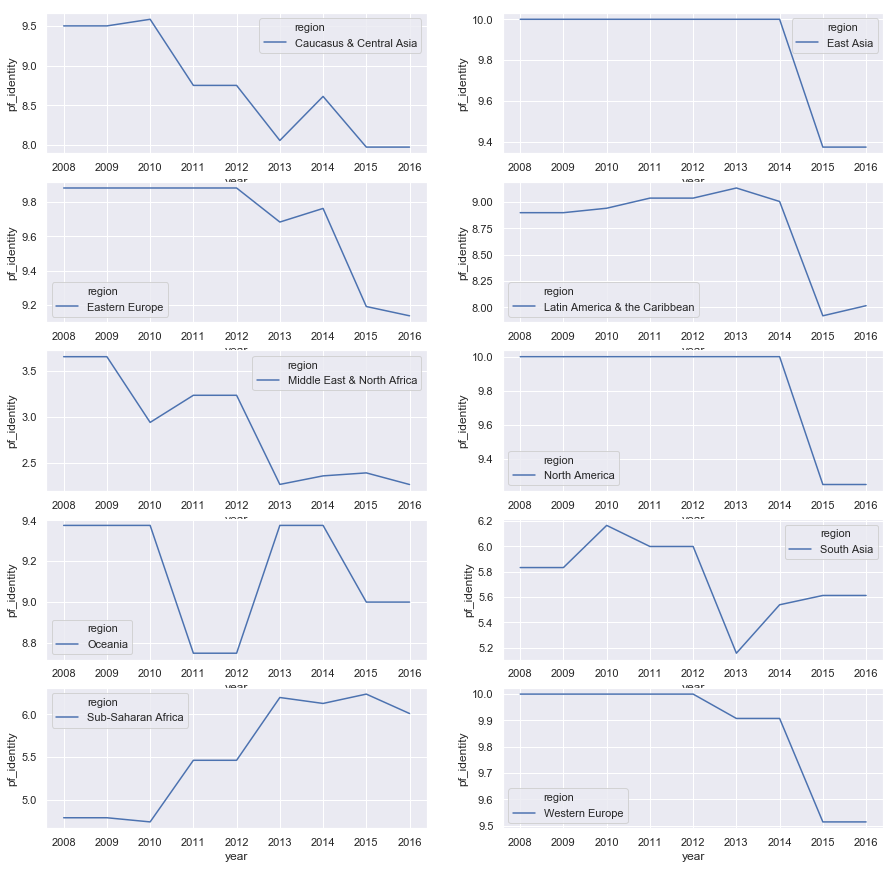

In [25]:
fig, axs = plt.subplots(nrows=round(len(regions.region.unique())/2), ncols=2, figsize=(15,15))
for i, region in enumerate(regions.region.unique()):
    sns.lineplot(x='year', y='pf_identity', data=regions[regions['region'] == region],
                 ax=axs[math.floor(i/2), i%2], hue='region')

In [26]:
regionsScore = pd.DataFrame(dataset[important_cols].groupby(['year','region']).agg('mean')['hf_score'])


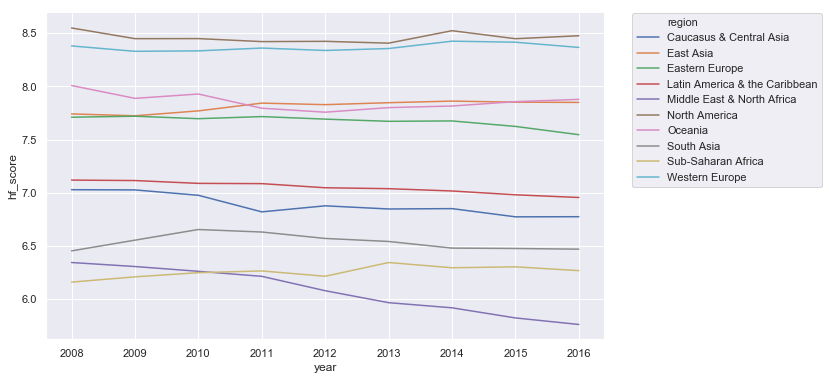

In [27]:
regionsScore.reset_index(inplace=True)

plt.figure(figsize=(10,6))
sns.lineplot(data=regionsScore, x='year', y='hf_score', hue='region', ci='sd')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

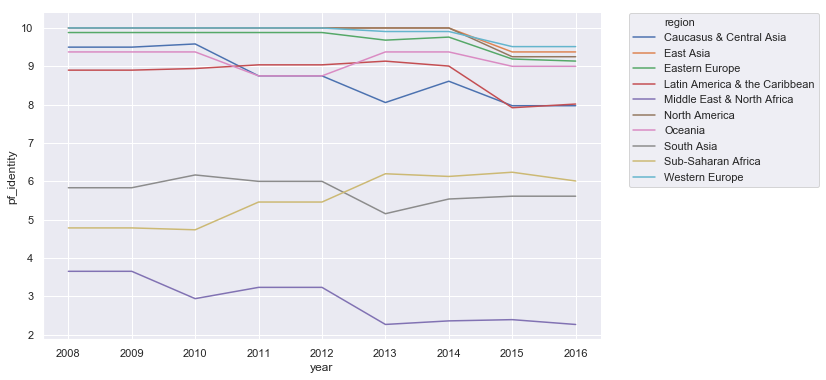

In [28]:
regions.reset_index(inplace=True)

plt.figure(figsize=(10,6))
sns.lineplot(data=regions, x='year', y='pf_identity', hue='region', ci='sd')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

<h5> En cuanto a la comparacion de <i>hf_score</i> vemos que las regiones se mantienen a traves de los años, pero la region de Medio Oriente y Africa del Norte influyen fuertemente en el grafico trazado mundialmente</h5>

<h5> Y para la variable <i>pf_identity</i> vemos que se asemeja mas a el grafico global, destacando regiones como Asia del sur, Medio oriente y Africa del Norte, y el Caucaso</h5>

In [29]:
# Graficando países de Latinoamerica
latinamerica = dataset_filtered[dataset_filtered['region'] == 'Latin America & the Caribbean'][['year','countries','pf_identity']]


In [30]:
latinamerica.countries.unique()

array(['Argentina', 'Bahamas', 'Barbados', 'Belize', 'Bolivia', 'Brazil',
       'Chile', 'Colombia', 'Costa Rica', 'Dominican Rep.', 'Ecuador',
       'El Salvador', 'Guatemala', 'Guyana', 'Haiti', 'Honduras',
       'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru',
       'Suriname', 'Trinidad and Tobago', 'Uruguay', 'Venezuela'],
      dtype=object)

In [31]:
import random

list_countries = latinamerica.countries.unique()
countries_selected = []
draws = []
for i in range(3):
    draws.append(random.randint(0,len(latinamerica.countries.unique())))

countries_selected = list_countries[draws]

In [32]:
df_selected = latinamerica[latinamerica['countries'].isin(countries_selected)]

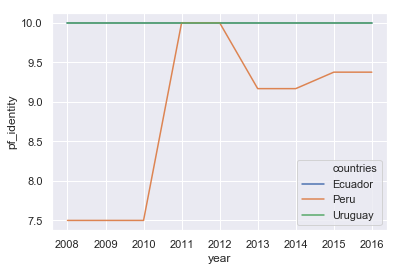

In [33]:
sns.lineplot(x='year', y='pf_identity', data=df_selected, hue='countries')

## 2. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?
  2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.
  3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.
  4. Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

<h4>1. Graficar en un mismo histograma la distribución de la variable pf_identity en global, y en Latinoamérica y el caribe. Repetir para la variable hf_score. 
¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?</4>

In [34]:
def to_categorical(column, bin_size=5, min_cut=15, max_cut=50):
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(np.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x+bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    return pd.cut(column, pd.IntervalIndex.from_tuples(intervals))

<h5>Plot para pf_identity</h5>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

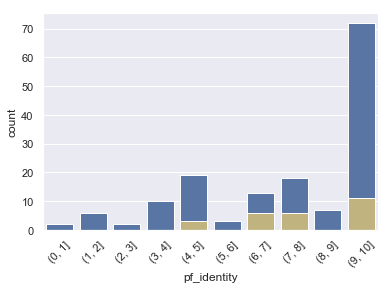

In [35]:
sns.countplot(to_categorical(dataset_filtered[dataset_filtered['year'] == 2016]['pf_identity'], bin_size=1, min_cut=0, max_cut=10), color='b')
sns.countplot(to_categorical(
    dataset_filtered[(dataset_filtered['year'] == 2016) & \
                      (dataset_filtered['region'] == 'Latin America & the Caribbean')]['pf_identity'], bin_size=1, min_cut=0, max_cut=10), color='y')
plt.xticks(rotation=45)

<h5>Plot para hf_score</h5>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

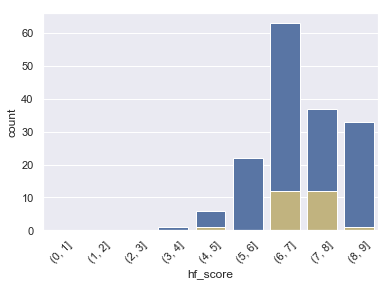

In [36]:
sns.countplot(to_categorical(dataset_filtered[dataset_filtered['year'] == 2016]['hf_score'], bin_size=1, min_cut=0, max_cut=10), color='b')
sns.countplot(to_categorical(
    dataset_filtered[(dataset_filtered['year'] == 2016) & \
                      (dataset_filtered['region'] == 'Latin America & the Caribbean')]['hf_score'], bin_size=1, min_cut=0, max_cut=10), color='y')
plt.xticks(rotation=45)

<h4>2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.</h4>

In [37]:
from scipy import stats

<h5>pf_identity</h5>

In [43]:
loc, scale = stats.norm.fit(dataset_filtered[dataset_filtered['year'] == 2016]['pf_identity'])
loc, scale

(6.9763374485555545, 3.0797021374054885)

In [44]:
stats.kstest(dataset_filtered[dataset_filtered['year'] == 2016]['pf_identity'], 'norm', args=(loc, scale))

KstestResult(statistic=0.20596882267043704, pvalue=1.6673313880666285e-06)

<h5>hf_score</h5>

In [45]:
loc, scale = stats.norm.fit(dataset_filtered[dataset_filtered['year'] == 2016]['hf_score'])
loc, scale

(6.88987064480247, 1.076263464333624)

In [46]:
stats.kstest(dataset_filtered[dataset_filtered['year'] == 2016]['hf_score'], 'norm', args=(loc, scale))

KstestResult(statistic=0.06130318005642588, pvalue=0.5685294616417451)

<h4>3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.</h4>

In [40]:
loc, scale = stats.norm.fit(dataset_filtered[dataset_filtered['year'] == 2016]['pf_identity'])
norm_dist = stats.norm(loc, scale)

In [41]:
percs = np.linspace(0,100,21) 
qn_sample = np.percentile(dataset_filtered[dataset_filtered['year'] == 2016]['pf_identity'], percs)
qn_norm_dist = np.percentile(norm_dist.rvs(len(dataset_filtered[dataset_filtered['year'] == 2016]['pf_identity'])), percs)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


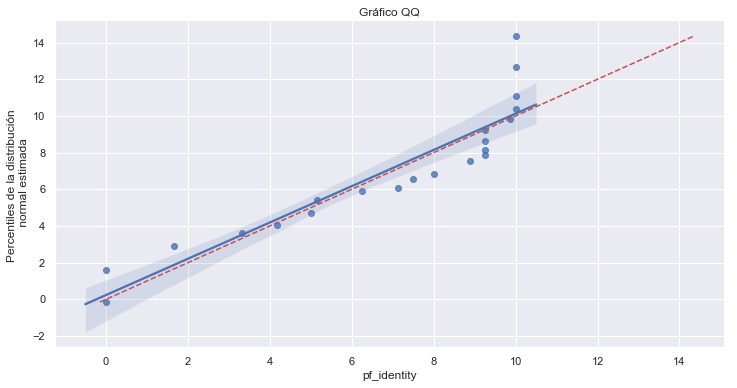

In [42]:
plt.figure(figsize=(12,6))
sns.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('pf_identity')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ')

x = np.linspace(np.min((qn_sample.min(), qn_norm_dist.min())), np.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color='r', ls="--")

sns.despine()

## 3. Correlaciones

En este ejercicio queremos responder a las preguntas

* Las libertades sociales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score. 

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.
3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)

<h4>1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?</h4>

In [84]:
dataset_pairplot = dataset_filtered[['pf_identity', 'hf_score', 'ef_score']]

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


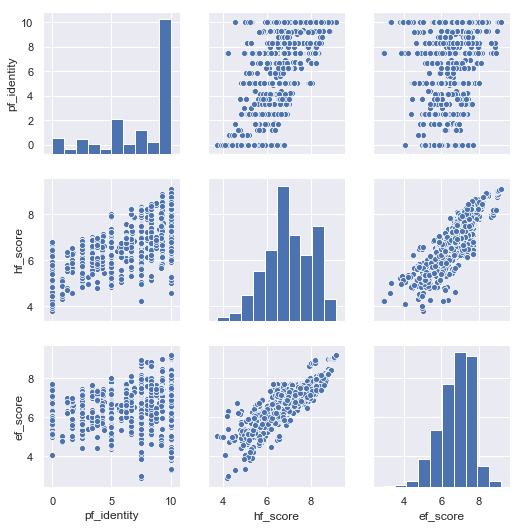

In [85]:
sns.pairplot(dataset_pairplot)

In [51]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

<h5>2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.</h5>

             pf_identity  hf_score
pf_identity     1.000000  0.677754
hf_score        0.677754  1.000000


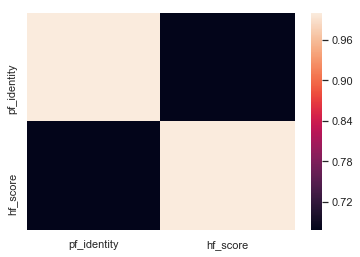

In [52]:
print(dataset_filtered[['pf_identity', 'hf_score']].corr())
sns.heatmap(dataset_filtered[['pf_identity', 'hf_score']].corr())

Pearson Correlation value is: 0.68


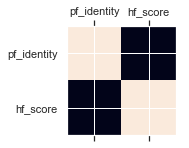

In [53]:
plot_corr(dataset_filtered[['pf_identity', 'hf_score']], 2)
print('Pearson Correlation value is: {0:.2f}'.format(dataset_filtered['pf_identity'].corr(dataset_filtered['hf_score'])))

             pf_identity  ef_score
pf_identity     1.000000  0.388877
ef_score        0.388877  1.000000


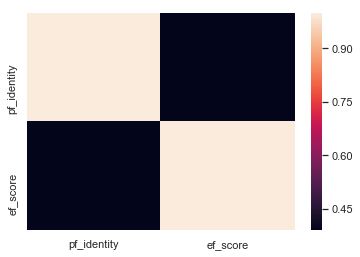

In [54]:
print(dataset_filtered[['pf_identity', 'ef_score']].corr())
sns.heatmap(dataset_filtered[['pf_identity', 'ef_score']].corr())

Pearson Correlation value is: 0.39


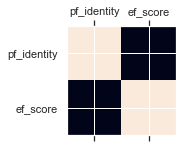

In [55]:
plot_corr(dataset_filtered[['pf_identity', 'ef_score']], 2)
print('Pearson Correlation value is: {0:.2f}'.format(dataset_filtered['pf_identity'].corr(dataset_filtered['ef_score'])))

<h5>3. Se calcula los coeficientes de correlación para 'pf_identity' y 'hf_score'</h5>

<h5>Debido a que en el punto anterior se determinó que esta variables no sigue una distribución normal.</h5>
<h5>descartamos Pearson, y usamos Spearman.</h5

In [57]:
print('Spearman Correlation value is: {0:.2f} \n'.format(dataset_filtered['pf_identity']\
                                                 .corr(dataset_filtered['hf_score'], method='spearman')))

Spearman Correlation value is: 0.69 

